In [222]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display   #for loading and visualizing audio files
import IPython.display as ipd   #to play audio

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import time 
import pickle

### Testing filepath directory

In [11]:
audio_fpath = '/Volumes/Extreme SSD/CAPSTONE_DATA/fma_medium/'
audio_clips = os.listdir(audio_fpath)
audio_clips[:15]

['README.txt',
 'checksums',
 '000',
 '001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012']

/Applications/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(661248,) 22050


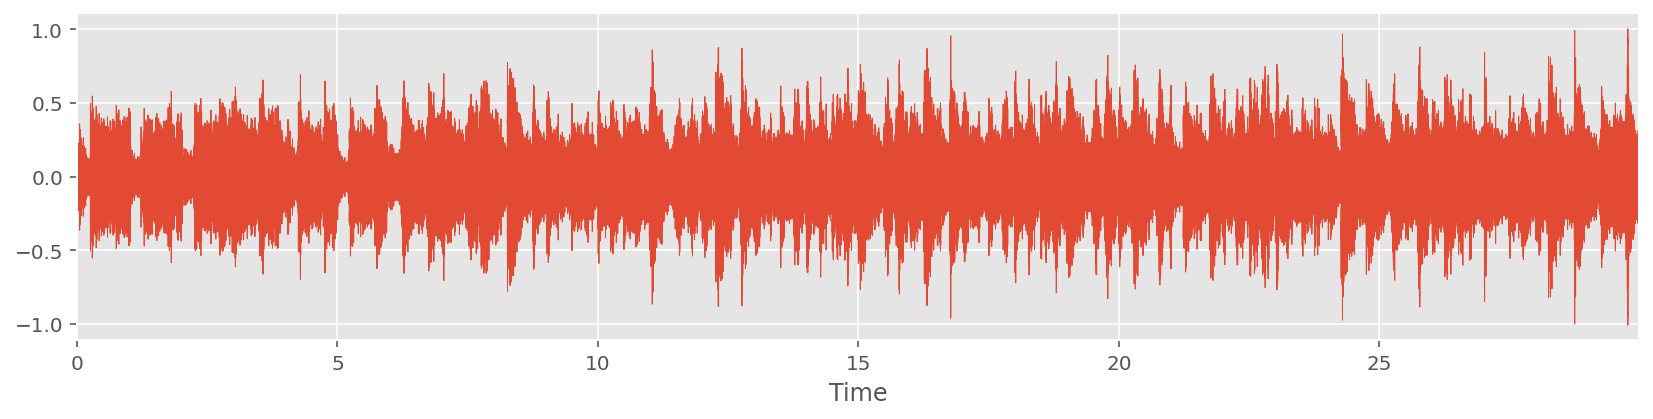

In [12]:
test_filepath = '/Volumes/Extreme SSD/CAPSTONE_DATA/fma_medium/155/155000.mp3'
y, sr = librosa.load(test_filepath, duration = 30) #specify the duration 25 is max duration of audio file
print(y.shape, sr)                                # y : audio time series
plt.figure(figsize=(14, 3))
librosa.display.waveplot(y, sr=sr)

In [8]:
y.shape

(551250,)

- **No. frames** =  y.shape / hop_length

/Applications/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Applications/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Applications/anaconda3/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


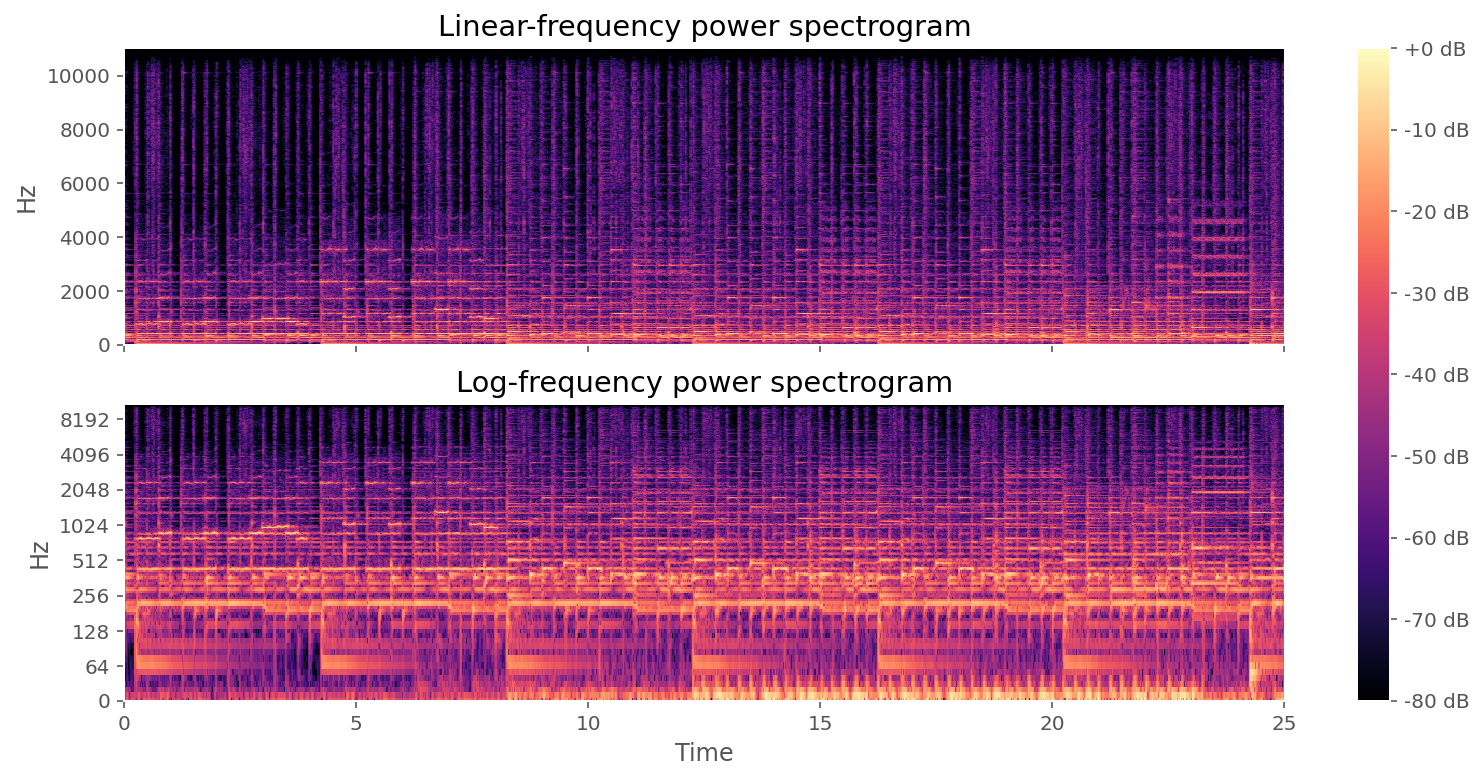

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(13,6))
hop_length = 512
Db1 = librosa.amplitude_to_db(np.abs(librosa.stft(y=y, hop_length = hop_length)), ref=np.max)
Db2 = librosa.amplitude_to_db(np.abs(librosa.stft(y=y)), ref=np.max)

img = librosa.display.specshow(Db1, sr = sr, y_axis='linear', x_axis='time', ax=ax[0])
librosa.display.specshow(Db2, sr=sr, hop_length = hop_length, y_axis='log', x_axis='time', ax=ax[1])

ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")
#plt.show(block=False)

<AxesSubplot:>

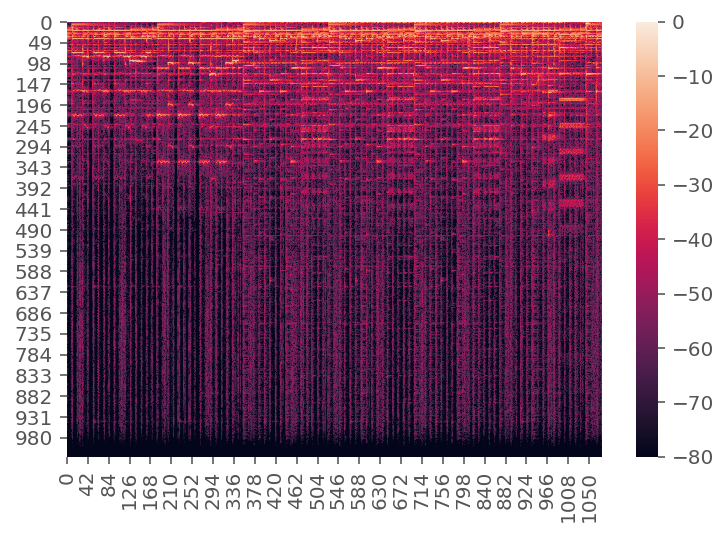

In [161]:
Db1_flat = Db1.ravel()
Db1_flat.shape
sns.heatmap(Db1)

# Librosa feature extractions

Feature descriptions : https://librosa.org/doc/latest/feature.html

- Spectral features ~ 15
- Rhythm features ~ 2
- Feature manipulation ~ not needed
- Feature inversion ~ not needed

### Spectral Features

- **y** : audio time series
- **sr** : sampling rate of y 
- **n_chroma** : Number of chroma bins to produce
- **n_fft** : FFT window size if provided 'y, sr' instead of 'S'
- **n_mfcc** :  number of MFCCs to return
- **S** : spectogram, melspectogram  

In [33]:
Spec = np.abs(librosa.stft(y=y, n_fft=2048))**2 
melspec_test = librosa.feature.melspectrogram(S=Spec, sr=sr)
melspec_test.shape

(128, 1077)

In [45]:
test_filepath = '/Volumes/Extreme SSD/CAPSTONE_DATA/fma_medium/155/155000.mp3'
y1, sr1 = librosa.load(test_filepath, duration =25)
y2, sr2 = librosa.load(test_filepath)

/Applications/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Applications/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [77]:
y, sr = librosa.load(test_filepath, duration = 30)

hop_length = 512
Spec = np.abs(librosa.stft(y=y, n_fft=2048))**2  # pre-computed power spectrogram with a larger frame
Spec2 = np.abs(librosa.stft(y=y))  # energy (magnitude) spectrum instead of power spectrogram, not as good
yharm = librosa.effects.harmonic(y)  #harmonic component of a song (need for tonnetz extraction)

#Chromagram is related to melody/harmonics

melspec_test = librosa.feature.melspectrogram(y=y, sr=sr)
chroma_stft_test = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12, hop_length=512) # S : power spectrogram  
chroma_stft_test2 = librosa.feature.chroma_stft(S = melspec_test, sr=sr, n_chroma=12) #not good i think
chroma_stft_test3 = librosa.feature.chroma_stft(S = Spec, sr=sr, n_chroma=12) #this is the one you want to use
chroma_cqt_test = librosa.feature.chroma_cqt(y=y, sr=sr, n_chroma=12)
chroma_cens_test = librosa.feature.chroma_cens(y=y, sr=sr, n_chroma=12)
mfcc_test = librosa.feature.mfcc(y=y, sr=sr, n_mfcc = 12) #S : log-power Mel spectrogram | MFCC relates more to timbre
rms_test = librosa.feature.rms(y=y, S = melspec_test)  #S : spectrogram magnitude
spec_cent_test = librosa.feature.spectral_centroid(y= y, sr=sr)

spec_bw_test = librosa.feature.spectral_bandwidth(y=y, sr=sr)
contrast_test = librosa.feature.spectral_contrast(S= Spec, sr=sr)
flatness_test = librosa.feature.spectral_flatness(y=y)
rolloff_test = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85) #default rolloff % : 85
poly_test = librosa.feature.poly_features(S=Spec, order=0) #coeffs of fitting an nth-order polynomial to columns of a spectrogram.
tonnetz_test = librosa.feature.tonnetz(y=yharm, sr=sr)
ZCR_test = librosa.feature.zero_crossing_rate(y=y) #Compute the zero-crossing rate of an audio time series.

#tested 3 different ways to calculate the chroma_stft and see different results

print("y , sr : ",y.shape, sr,"|","hop_length :", hop_length)
print(" ")
print("chroma_stft","/","shape :",chroma_stft_test.shape)
print(chroma_stft_test)
print("______________________")
print("chroma_stft2","/","shape :",chroma_stft_test2.shape)
print(chroma_stft_test2)
print("______________________")
print("chroma_stft3","/","shape :",chroma_stft_test3.shape)
print(chroma_stft_test3)
print("______________________")

print("chroma_cqt","/","shape :",chroma_cqt_test.shape)
print(chroma_cqt_test)
print("______________________")
print("chroma_cens","/","shape :",chroma_cens_test.shape)
print(chroma_cens_test)
print("______________________")
print("melspec","/","shape :",melspec_test.shape)
print(melspec_test)
print("______________________")
print("mfcc","/","shape :",mfcc_test.shape)
print(mfcc_test)
print("______________________")
print("rms","/","shape :",rms_test.shape) 
print(rms_test)
print("______________________")
print("spec_centroid","/","shape :",spec_cent_test.shape) 
print(spec_cent_test)
print("______________________")
print("spec_bandwidth","/","shape :",spec_bw_test.shape) 
print(spec_bw_test)
print("______________________")
print("spectral_contrast","/","shape :",contrast_test.shape) 
print(contrast_test)
print("______________________")
print("spectral_flatness","/","shape :",flatness_test.shape) 
print(flatness_test)
print("______________________")
print("spectral_rolloff","/","shape :",rolloff_test.shape) 
print(rolloff_test)
print("______________________")
print("poly_features","/","shape :",poly_test.shape) 
print(poly_test)
print("______________________")
print("tonnetz","/","shape :",tonnetz_test.shape) 
print(tonnetz_test)
print("______________________")
print("zero_crossing_rate","/","shape :",ZCR_test.shape) 
print(ZCR_test)
print("______________________")


'''Computing the RMS value from audio samples is faster as it doesn't require a STFT calculation. 
However, using a spectrogram will give a more accurate representation of energy over time because 
its frames can be windowed, thus prefer using ``S`` if it's already available.''';

/Applications/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


y , sr :  (661248,) 22050 | hop_length : 512
 
chroma_stft / shape : (12, 1292)
[[0.79885995 0.14977518 0.03477222 ... 1.         0.8801801  0.6022946 ]
 [0.43426648 0.14428182 0.08620129 ... 0.14200932 0.20536087 0.31509727]
 [0.42446092 0.22578377 0.26186496 ... 0.22731929 0.25035453 0.18179606]
 ...
 [0.7135064  0.3007278  0.2547642  ... 0.4474146  0.63017726 0.5630039 ]
 [0.67518854 0.16460654 0.0842116  ... 0.2742959  0.3558875  0.42806715]
 [0.6424804  0.09751891 0.02332706 ... 0.50157535 0.2979565  0.31857136]]
______________________
chroma_stft2 / shape : (12, 1292)
[[0.68039656 0.32293758 0.32654932 ... 0.30970076 0.46421552 0.60653144]
 [0.91999614 0.75228524 0.8118915  ... 0.6752197  0.98564816 1.        ]
 [1.         1.         1.         ... 0.7243542  1.         0.9669731 ]
 ...
 [0.24641575 0.14462572 0.17975527 ... 0.23902419 0.3081578  0.29299623]
 [0.16657194 0.129811   0.18114455 ... 0.2162712  0.24669455 0.24066597]
 [0.41236192 0.13795914 0.13463712 ... 0.14741142

### Rhythm features

In [79]:
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)  #Compute the tempogram: local autocorrelation of the onset strength envelope.
tempogram_test = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)


ac_global = librosa.autocorrelate(oenv, max_size=tempogram_test.shape[0])   #Compute global onset autocorrelation
ac_global_test = librosa.util.normalize(ac_global)                          #maybe not needed

tempo_test = librosa.beat.tempo(onset_envelope= oenv, sr=sr, hop_length=hop_length)[0]

print("tempogram","/","shape :",tempogram_test.shape) 
print(tempogram_test)
print("______________________")
print("global_autocorr","/","shape :",ac_global_test.shape) 
print(ac_global_test[0:20])
print("______________________")
print("tempo","/","shape :",tempo_test.shape) 
print(tempo_test)
print("______________________")

tempogram / shape : (384, 1292)
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 5.65540841e-01  5.66537933e-01  5.67533088e-01 ...  6.86451356e-01
   6.86785385e-01  6.87129854e-01]
 [ 2.77906614e-01  2.78649387e-01  2.79391915e-01 ...  3.78174791e-01
   3.78572065e-01  3.78989172e-01]
 ...
 [ 6.30897100e-18  1.67051942e-17  2.59148136e-17 ...  3.43820708e-12
   3.70949539e-12  1.27956819e-12]
 [ 6.22246884e-17  4.38456746e-17  3.24882552e-17 ...  1.71726723e-13
   4.25144743e-13  1.46511364e-13]
 [ 6.48563200e-17 -5.03371154e-18  4.59984004e-17 ...  4.39471540e-17
   8.41497692e-17 -1.92470123e-17]]
______________________
global_autocorr / shape : (384,)
[1.         0.6806024  0.36540243 0.25251954 0.22673543 0.23489635
 0.23409363 0.22816014 0.26898517 0.42298056 0.67432769 0.76549012
 0.55389547 0.32526054 0.24101137 0.23856603 0.24479852 0.23098678
 0.22959373 0.29764698]
______________________
tempo / shape : ()
117.45383

### Beats and Tempo features

In [51]:
tempo_test, beats_test = librosa.beat.beat_track(y=y, sr=sr)
pulse_test = librosa.beat.plp(onset_envelope=oenv, sr=sr)

print("tempo, beats","/","shape :",tempo_test.shape, beats_test.shape) 
print(tempo_test, beats_test)
print("______________________")
print("pulse","/","shape :",pulse_test.shape) 
print(pulse_test)
print("______________________")

tempo, beats / shape : () (59,)
117.45383522727273 [  12   34   54   77   98  120  141  162  183  205  226  248  270  292
  314  335  357  378  399  421  442  464  485  507  528  550  572  594
  615  636  658  680  701  723  744  766  787  809  830  852  873  894
  915  937  959  981 1002 1024 1046 1067 1088 1110 1131 1152 1174 1196
 1217 1239 1261]
______________________
pulse / shape : (1292,)
[0.8853648  0.8122227  0.48106992 ... 0.1429353  0.5800741  0.8229404 ]
______________________


### Spectogram Decomposition features

In [52]:
S1 = np.abs(librosa.stft(y=y))
S2 = np.abs(librosa.stft(y=y, n_fft=2048))**2
S3 = librosa.stft(y=y)

comps_test, acts_test = librosa.decompose.decompose(S=S1, n_components=1)
H_test, P_test = librosa.decompose.hpss(S=S3)                   #Separate into harmonic and percussive

print("comps, acts","/","shape :",comps_test.shape,"|",acts_test.shape) 
print(comps_test,"|", acts_test)
print("______________________")
print("H, P","/","shape :",H_test.shape,"|",P_test.shape) 
print(H_test,"|", P_test)
print("______________________")

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


comps, acts / shape : (1025, 1) | (1, 1292)
[[2.2159887e+01]
 [2.1071182e+01]
 [9.2410126e+00]
 ...
 [1.8295427e-04]
 [2.0097368e-04]
 [2.0145492e-04]] | [[0.18531983 0.7957541  1.3330194  ... 1.4896529  1.592529   1.0534194 ]]
______________________
H, P / shape : (1025, 1292) | (1025, 1292)
[[-2.02027246e-01+3.0505266e-08j -2.37117028e+00+3.5803677e-07j
  -7.81360435e+00+1.1798214e-06j ... -1.48241720e+01+2.2383877e-06j
  -3.14730701e+01+4.7523013e-06j -1.33969841e+01+2.0228883e-06j]
 [-1.99171990e-01+3.0074133e-08j  1.15782775e-01-2.0911999e+00j
   4.81957912e+00-3.3527479e+00j ...  9.37661171e+00-2.2401199e+01j
   2.72291050e+01+5.7424140e+00j  3.84557247e-01+1.2875063e+01j]
 [-3.04991696e-02+4.6052464e-09j  9.63854790e-01+1.7191638e-01j
  -6.35215282e-01+1.4467955e+00j ... -7.65593955e-03+9.0987997e+00j
  -1.51658278e+01-4.5565367e+00j  9.16191196e+00-3.1839516e+00j]
 ...
 [-6.39636028e-06+9.6582356e-13j  7.27684665e-06+2.0989586e-05j
  -2.30633009e-06-1.7972579e-05j ... -2.855550

### Effects features

In [53]:
y_harmonic_test, y_percussive_test = librosa.effects.hpss(y=y)

print("y_harmonic, y_percussive","/","shape :",y_harmonic_test.shape,"|",y_percussive_test.shape) 
print(y_harmonic_test,"|", y_percussive_test)
print("______________________")

y_harmonic, y_percussive / shape : (661248,) | (661248,)
[-0.00224158 -0.00235334 -0.00253277 ...  0.          0.
  0.        ] | [0.00224159 0.00235335 0.00253277 ... 0.         0.         0.        ]
______________________


## Useable Features for Classification 
**Spectral** (14)

- melspec = librosa.feature.melspectrogram(y=y, sr=sr)
- chroma_stft = librosa.feature.chroma_stft(S = Spec, sr=sr, n_chroma=12)
- chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr, n_chroma=12)
- chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr, n_chroma=12)
- mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20) 
- rms = librosa.feature.rms(y=y, S = melspec_test)  #S : spectrogram magnitude
- spec_cent = librosa.feature.spectral_centroid(y= y, sr=sr)
- spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
- contrast = librosa.feature.spectral_contrast(S= Spec, sr=sr)
- flatness = librosa.feature.spectral_flatness(y=y)
- rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
- poly = librosa.feature.poly_features(S=Spec, order=0)
- tonnetz = librosa.feature.tonnetz(y=yharm, sr=sr)
- ZCR = librosa.feature.zero_crossing_rate(y=y) 

**Rhythm** (1)
- tempo = librosa.beat.tempo(onset_envelope= oenv, sr=sr, hop_length=hop_length)[0]    **(same as below)**


**Beats & tempo** (2-3)

- tempo, beats = librosa.beat.beat_track(y=y, sr=sr)  **(beats MAYBE)**
- pulse = librosa.beat.plp(onset_envelope=oenv, sr=sr)

**Spectogram Decomposition** (1-2)
- comps, acts = librosa.decompose.decompose(S=S1, n_components=1) **(comps MAYBE)** 

**Effects** (0)


In [69]:
# check Stacking